In [1]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

import statsmodels.api as sm    #안쓸걸
import sklearn as sk

from sklearn.model_selection import train_test_split        # 함수

In [2]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [4]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [30]:
# 훈련시킬 입력데이터(다섯가지 특성)
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[154:])
# 'Weight','Length','Diagonal','Height','Width' ---> x0, x1, x2, x3, x4

[[12.2    12.2    13.4     2.0904  1.3936]
 [13.4    12.4    13.5     2.43    1.269 ]
 [12.2    13.     13.8     2.277   1.2558]
 [19.7    14.3    15.2     2.8728  2.0672]
 [19.9    15.     16.2     2.9322  1.8792]]


In [29]:
# 어종에 대해 예측할 결과값
fish_target = fish['Species'].to_numpy()
fish_target[154:]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

In [7]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state= 42)
# random_state를 변경하면서 훈련을 해볼 것
# 시계열 데이터는 이렇게 나누면 시계열이 섞여버리기 때문에 이 방법을 사용하지 않음

In [8]:
train_input.shape

(119, 5)

#### 단위값을 표준화

In [9]:
# 단위갭이 많이나므로 -2 ~2 정도의 실수로 변형
# 표준화 식 = ( 실제값 - 평균값 ) / 표준편차
from sklearn.preprocessing import StandardScaler    # fit(), transform() 등의 함수를 묶어놓은 클래스

In [10]:
ss= StandardScaler()    # 생성자
ss.fit(train_input)     # x0~ x4 평균, 표준편차 등 구해놓음
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### KNN 분류 알고리즘

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [13]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

#### KNN 분류로 예측

In [14]:
test_input[:5]

array([[ 78.    ,  18.7   ,  19.4   ,   5.1992,   3.1234],
       [ 13.4   ,  12.4   ,  13.5   ,   2.43  ,   1.269 ],
       [200.    ,  32.3   ,  34.8   ,   5.568 ,   3.3756],
       [270.    ,  26.    ,  28.7   ,   8.3804,   4.2476],
       [150.    ,  23.    ,  24.5   ,   5.2185,   3.626 ]])

In [15]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [16]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [17]:
print(kn.classes_)
proba = kn.predict_proba(test_scaled[:5])   # 예측 결과값을 한눈에 파악할 수 있는 함수
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


#### 로지스틱 회귀

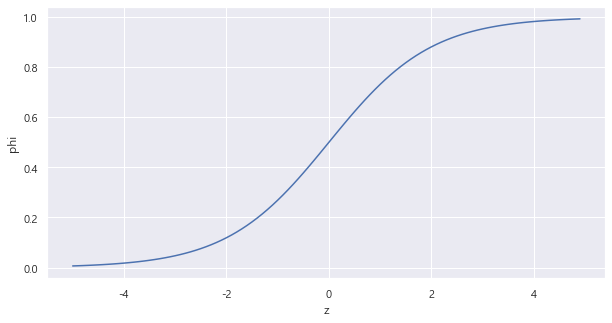

In [18]:
z= np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))  # sigmoid | 시그모이드(로지스틱) 함수
plt.figure(figsize=(10,5))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 로지스틱 회귀 - 이진 분류 수행

In [19]:
# 전체에서 Bream, Smelt만 뽑아내기 위해서 인덱스 만듬
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [31]:
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

#### 이항 로지스틱 회귀 (두개만 분류) Bream | Smelt

In [20]:
from sklearn.linear_model import LogisticRegression # 클래스

In [21]:
lr= LogisticRegression()    # 로지스틱 회귀 클래스
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [22]:
# 훈련에 대한 정확도
print(lr.score(train_bream_smelt, target_bream_smelt))

1.0


In [33]:
# 실제 타겟값
target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [23]:
# 예측 타겟값
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:

print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [25]:
print(lr.classes_)

['Bream' 'Smelt']


In [26]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


z = ax0 + bx1 + cx2 + dx3 + ex4 + f

여기서부터 day4 강의 내용

#### test 데이터로 예측

In [34]:
# 40 of 159 테스트 데이터를 인덱싱
bream_smelt_indexes_2 = (test_target == 'Bream') | (test_target == 'Smelt')
bream_smelt_indexes_2

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False])

In [35]:
# Bream 과 Smelt를 가진 테스트 데이터 분리
test_bream_smelt = test_scaled[bream_smelt_indexes_2]
testtarget_bream_smelt = test_target[bream_smelt_indexes_2]

In [39]:
test_bream_smelt

array([[-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [ 1.70778862,  0.79685229,  0.98412932,  2.49283113,  1.31347159],
       [-1.08726098, -1.67709884, -1.70848587, -1.76175528, -2.01154694],
       [ 0.72262512,  0.46886634,  0.64538096,  1.38570915,  0.7798447 ],
       [ 0.58188748,  0.32830094,  0.51509312,  1.62381742,  0.6898706 ],
       [ 0.86336276,  0.60943175,  0.80172635,  1.82199404,  0.69535682],
       [ 1.48260839,  0.93741769,  1.11441715,  2.26561331,  1.13260901],
       [ 0.86336276,  0.42201121,  0.61063753,  1.48117965,  0.51028814],
       [-1.07881672, -1.56464651, -1.57819804, -1.64186151, -1.92900972],
       [ 0.610035  ,  0.46886634,  0.6366951 ,  1.67197249,  0.41787572],
       [ 0.30041219,  0.2814458 ,  0.44560628,  1.20923936, -0.04894113],
       [ 0.30041219,  0.20647759,  0.42823457,  1.32466334,  0.31156486],
       [ 1.58112475,  0.93741769,  1.10573129,  2.27724461,  1.12389201],
       [-1.0881054 , -1.75206705, -1.7

In [43]:
testtarget_bream_smelt

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream'], dtype=object)

In [44]:
# 테스트 데이터로 정확도 확인
lr.score(test_bream_smelt, testtarget_bream_smelt)

1.0

In [46]:
# 실제 타겟값 확인
print(testtarget_bream_smelt)

['Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream']


In [47]:
# 예측 타겟값 확인
lr.predict(test_bream_smelt)

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream'], dtype=object)

In [49]:
# 확률표 도출
proba = lr.predict_proba(test_bream_smelt)
print(np.round(proba, decimals = 3))

[[0.04  0.96 ]
 [0.999 0.001]
 [0.026 0.974]
 [0.994 0.006]
 [0.994 0.006]
 [0.997 0.003]
 [0.999 0.001]
 [0.994 0.006]
 [0.036 0.964]
 [0.994 0.006]
 [0.981 0.019]
 [0.986 0.014]
 [0.999 0.001]
 [0.023 0.977]
 [0.034 0.966]
 [0.951 0.049]]


#### 로지스틱 회귀 다중분류

이전 이진 분류 -> 확장하면 다중 분류ㅋ

In [60]:
lr = LogisticRegression(C= 20,      # C는 alpha와 반대로 작을수록 규제가 적다
                        max_iter= 300
                        )
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=300)

In [61]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [69]:
print(lr.predict(test_scaled[:10]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike']


In [70]:
print(test_target[:10])

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike']


In [73]:
# 예측고 ㅏ실제가 맞느닞 확인

print(lr.classes_)
proba = lr.predict_proba(test_scaled[:10])
print(np.round(proba, decimals=3))


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.32  0.015 0.638 0.001 0.018]
 [0.    0.002 0.802 0.002 0.182 0.    0.011]
 [0.    0.    0.023 0.977 0.    0.    0.   ]]


In [75]:
# 다중 분류일 경우 선형방정식의 모습을 확인하기위해 coef_ 와 intercept 확인
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [80]:
# 다중분류는 클래스마다 z값을 하나씩 계산함.
# 클래스가 7개이니 z값도 7개가 나옴
# 이진분류는 시그모이드 함수를 사용했지만 다중 분류는 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환함.
decision = lr.decision_function(test_scaled[:10])
print(np.round(decision, decimals=1))

[[ -6.5   1.    5.2  -2.7   3.3   0.3  -0.6]
 [-10.9   1.9   4.8  -2.4   3.    7.8  -4.3]
 [ -4.3  -6.2   3.2   6.5   2.4   2.4  -3.9]
 [ -0.7   0.5   2.6  -1.2   3.3  -5.8   1.3]
 [ -6.4  -2.    5.8  -0.1   3.5  -0.1  -0.7]
 [ 16.7   8.3  -3.3  -4.9   0.9 -26.5   8.8]
 [-12.3   1.9   5.8  -2.9   3.2   8.7  -4.3]
 [ -2.6  -0.8   2.9  -0.2   3.6  -2.9   0. ]
 [ -3.8  -1.1   5.   -0.9   3.5  -3.4   0.7]
 [  1.7 -14.5  10.5  14.3  -0.9 -12.2   1.1]]


In [81]:
from scipy.special import softmax

In [82]:
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))
# 교재 192p 를 참고하여 정리

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.32  0.015 0.638 0.001 0.018]
 [0.    0.002 0.802 0.002 0.182 0.    0.011]
 [0.    0.    0.023 0.977 0.    0.    0.   ]]
